##### Importamos las librerias necesearias

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

##### Cargamos los datos

In [31]:
# mercadona1_df = pd.read_csv('datasets/Mercadona_Intervalo_1_Dataset.csv')
mercadona_df = pd.read_csv('datasets/dataset_unificado_mercadona.csv')

In [32]:
print("CARGA DE DATOS DEL DATASET MERCADONA")
print("\n")
mercadona_df.head()

CARGA DE DATOS DEL DATASET MERCADONA




,id,supermarket,category,name,price,reference_price,reference_unit,insert_date,PIBFecha
0,248789,mercadona-es,fruta,Banana,0.26,1.29,kg,2020-07-21 16:06:00,287.632
1,248790,mercadona-es,fruta,PlÃ¡tano,0.34,1.99,kg,2020-07-21 16:06:00,287.632
2,248791,mercadona-es,fruta,PlÃ¡tano macho,0.58,1.95,kg,2020-07-21 16:06:00,287.632
3,248792,mercadona-es,fruta,Uva blanca sin semillas,2.84,3.79,kg,2020-07-21 16:06:00,287.632
4,248793,mercadona-es,fruta,Uva negra sin semillas,2.99,3.99,kg,2020-07-21 16:06:00,287.632


In [33]:
print("VISUALIZACION DE LA INFORMACION ESTADISTICA DEL DATASET DE MERCADONA")
print("\n")
mercadona_df.describe()

VISUALIZACION DE LA INFORMACION ESTADISTICA DEL DATASET DE MERCADONA




,id,price,reference_price,PIBFecha
count,7.611020e+05,761102.000000,761102.000000,7.611020e+05
mean,6.293395e+05,6.265762,6.946805,2.876320e+02
std,2.197114e+05,67.922137,12.292162,3.979042e-13
min,2.487890e+05,0.100000,0.010000,2.876320e+02
25%,4.390642e+05,1.210000,1.630000,2.876320e+02
50%,6.293395e+05,1.980000,3.980000,2.876320e+02
75%,8.196148e+05,3.740000,8.000000,2.876320e+02
max,1.009890e+06,2470.050000,432.430000,2.876320e+02


In [34]:
print("VISUALIZACION DE LA INFORMACION DEL DATASET DE MERCADONA")
print("\n")
mercadona_df.info()

VISUALIZACION DE LA INFORMACION DEL DATASET DE MERCADONA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761102 entries, 0 to 761101
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               761102 non-null  int64  
 1   supermarket      761102 non-null  object 
 2   category         761102 non-null  object 
 3   name             761102 non-null  object 
 4   price            761102 non-null  float64
 5   reference_price  761102 non-null  float64
 6   reference_unit   761102 non-null  object 
 7   insert_date      761102 non-null  object 
 8   PIBFecha         761102 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 52.3+ MB


In [35]:
print("VALORES NULOS DEL DATASET DE MERCADONA")
print("\n")
mercadona_df.isnull().sum()

VALORES NULOS DEL DATASET DE MERCADONA




id                 0
supermarket        0
category           0
name               0
price              0
reference_price    0
reference_unit     0
insert_date        0
PIBFecha           0
dtype: int64

##### 1. Preparación de los datos 

Revisamos las categorías únicas de 'category' y 'reference_unit'


In [36]:
print("\nCategorías únicas en 'category':")
print(mercadona_df['category'].unique())

print("\nUnidades únicas en 'reference_unit':")
print(mercadona_df['reference_unit'].unique())


Categorías únicas en 'category':
['fruta' 'lechuga_y_ensalada_preparada' 'verdura' 'pescado_fresco'
 'marisco' 'pescado_en_bandeja' 'pescado_congelado' 'salazones_y_ahumados'
 'cerdo' 'aves_y_pollo' 'vacuno' 'conejo_y_cordero' 'embutido'
 'hamburguesas_y_picadas' 'empanados_y_elaborados' 'golosinas' 'arreglos'
 'carne_congelada' 'aves_y_jamon_cocido' 'chopped_y_mortadela'
 'jamon_serrano' 'embutido_curado' 'bacon_y_salchichas'
 'queso_untable_y_fresco' 'queso_curado_semicurado_y_tierno'
 'queso_lonchas_rallado_y_en_porciones' 'especias' 'pate_y_sobrasada'
 'pan_de_horno' 'pan_de_molde_y_otras_especialidades'
 'pan_tostado_y_rallado' 'picos_rosquilletas_y_picatostes'
 'bolleria_de_horno' 'bolleria_envasada' 'tartas_y_pasteles'
 'harina_y_preparado_reposteria' 'velas_y_decoracion'
 'leche_y_bebidas_vegetales' 'mantequilla_y_margarina' 'huevos' 'cereales'
 'tortitas' 'galletas' 'cafe_capsula_y_monodosis' 'cafe_molido_y_en_grano'
 'cafe_soluble_y_otras_bebidas' 'cacao_soluble_y_chocolate_

Vamos a filtrar los datos para precios entre 0 y 10 euros


/var/folders/t2/q4yqyh8x5679cw58580w35680000gn/T/ipykernel_58465/2173511152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


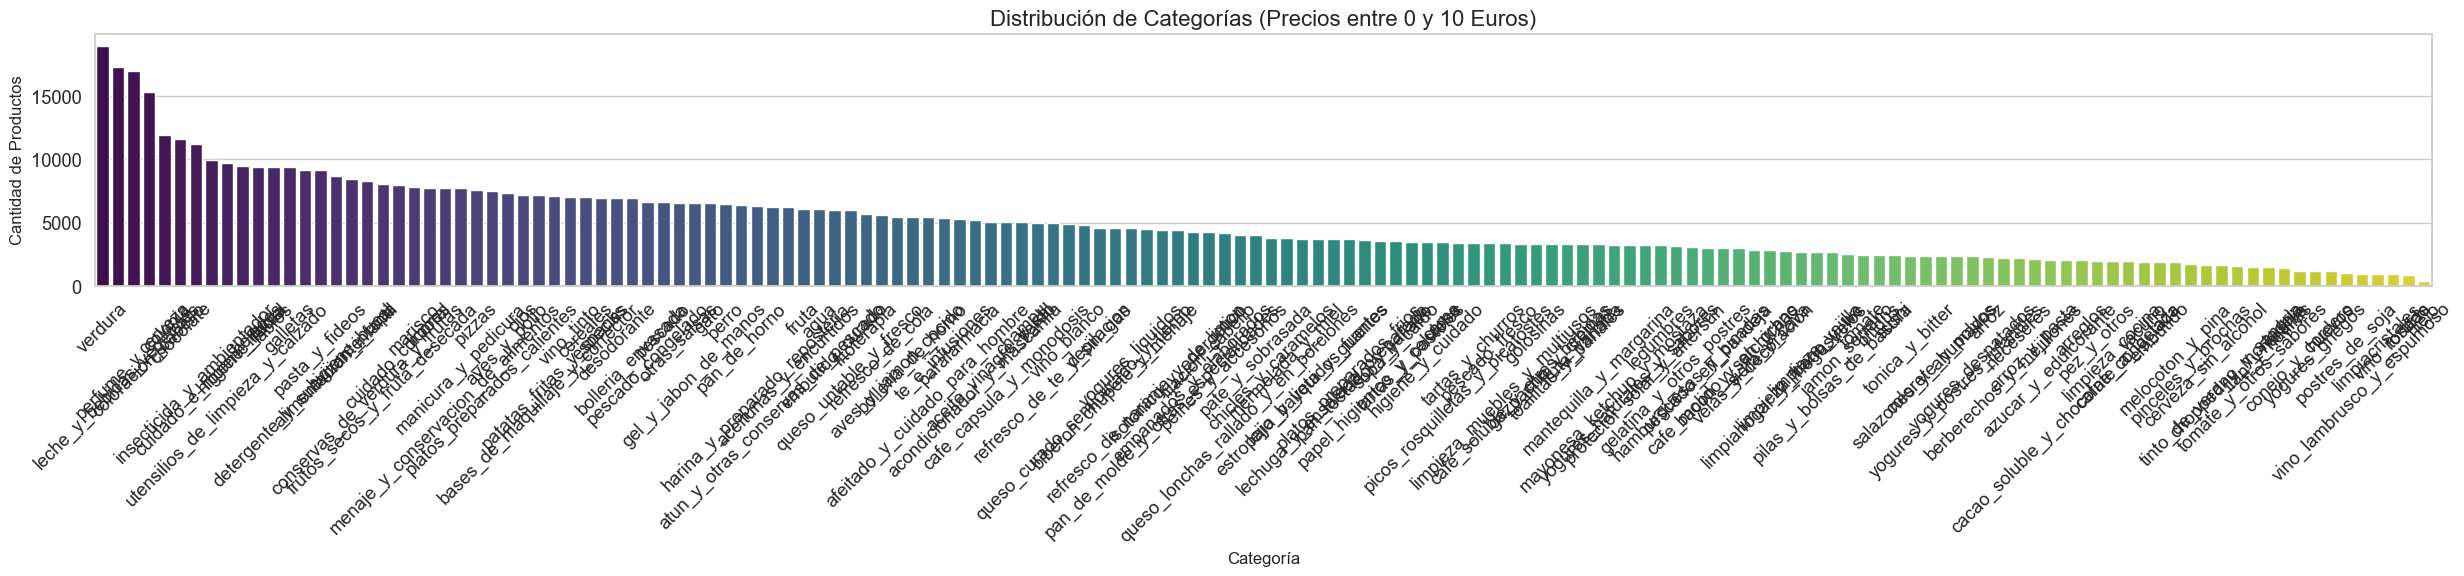

In [37]:
filtered_data = mercadona_df[(mercadona_df['price'] >= 0) & (mercadona_df['price'] <= 10)]

category_counts = filtered_data['category'].value_counts()

plt.figure(figsize=(25, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Distribución de Categorías (Precios entre 0 y 10 Euros)", fontsize=16)
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Cantidad de Productos", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Detección, tratamiento de outliers y visualización de patrones significativos

OUTLIERS FALLIDOS

Ahora vamos a detectar Outliers, para ello utilizamos el metodo del rango intercuartil (IQR)
El IQR (Interquartile Range) mide el rango entre el primer cuartil (Q1, 25%) y el tercer cuartil (Q3, 75%). Los valores considerados outliers son aquellos que están fuera del rango

Calculamos el IQR para la columna 'price'

In [38]:
Q1 = mercadona_df['price'].quantile(0.25)  # Primer cuartil
Q3 = mercadona_df['price'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartil

Definimos los limites inferior y superior para no considerar outliers

In [39]:
lower_bound = Q1 - 1.5 * IQR
if (lower_bound < 0) :
    lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

print(f"Rango intercuartil (IQR): {IQR}")
print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")

Rango intercuartil (IQR): 2.5300000000000002
Límite inferior: 0
Límite superior: 7.535


Filtramos el dataset eliminando los outliers

In [40]:
filtered_dataset = mercadona_df[(mercadona_df['price'] >= lower_bound) & (mercadona_df['price'] <= upper_bound)]

print(f"Registros originales: {len(mercadona_df)}")
print(f"Registros sin outliers: {len(filtered_dataset)}")

Registros originales: 761102
Registros sin outliers: 705543


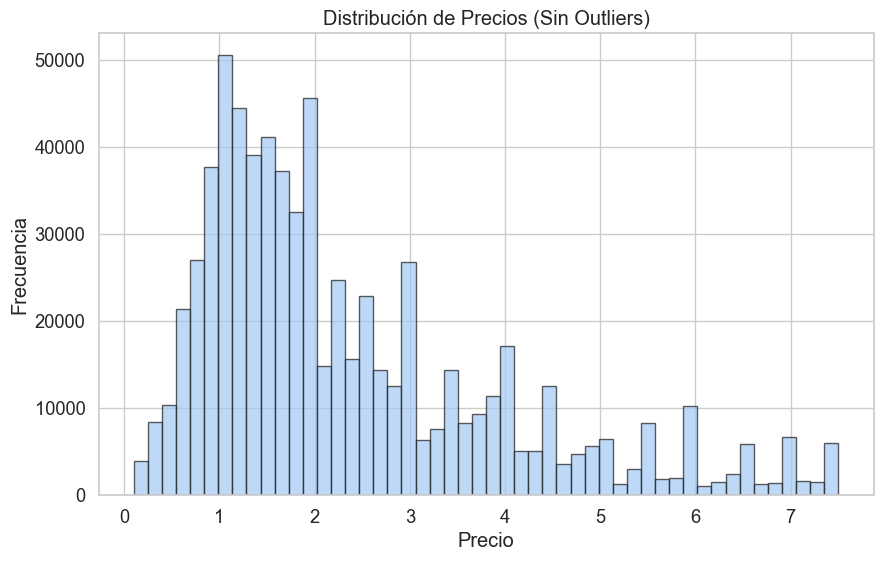

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_dataset['price'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución de Precios (Sin Outliers)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Ahora si analizamos las categorias y representamos el precio podemos ver el problema de quitar outliers en este dataset

In [42]:
category_stats = filtered_dataset.groupby('category')[['price', 'reference_price']].agg(['mean', 'median', 'std', 'count'])
category_stats.columns = ['_'.join(col) for col in category_stats.columns]  # Renombrar columnas para mayor claridad
category_stats = category_stats.sort_values(by='price_mean', ascending=False)  # Ordenar por precio promedio

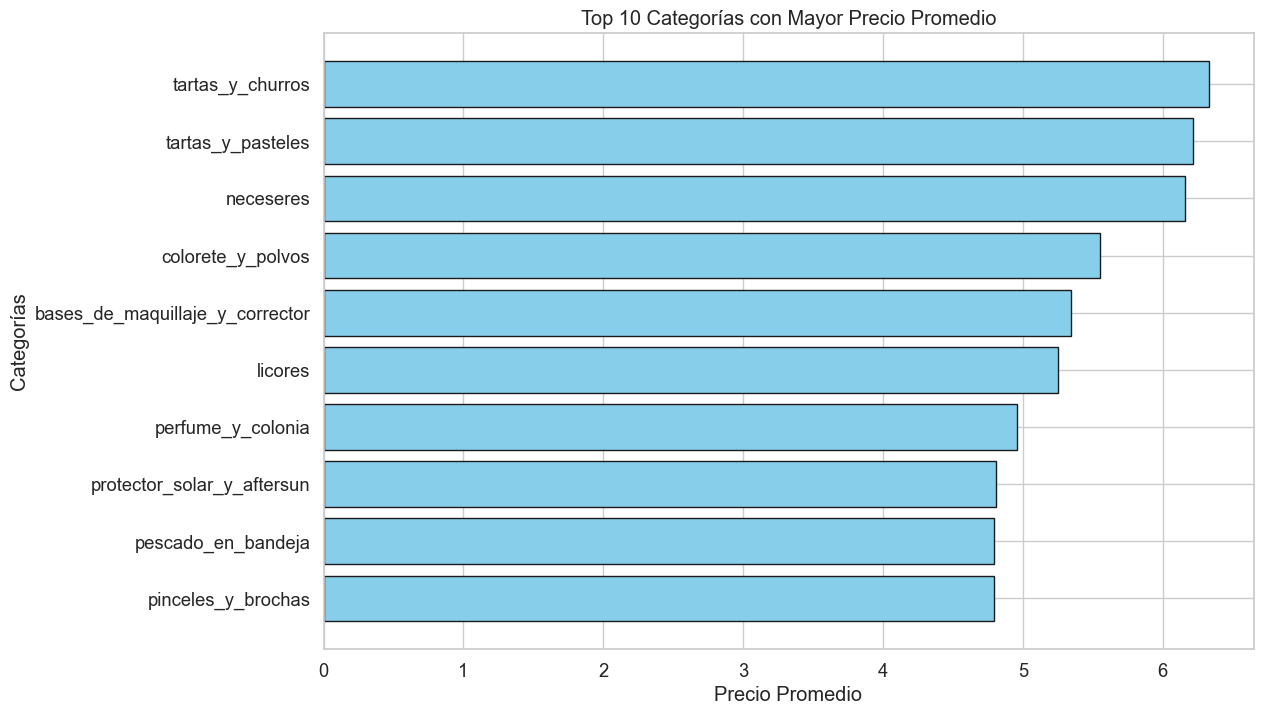

In [43]:
top_categories = category_stats.head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_categories.index, top_categories['price_mean'], color='skyblue', edgecolor='k')
plt.title('Top 10 Categorías con Mayor Precio Promedio')
plt.xlabel('Precio Promedio')
plt.ylabel('Categorías')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar las categorías más caras arriba
plt.show()

In [44]:
category_stats = mercadona_df.groupby('category')[['price', 'reference_price']].agg(['mean', 'median', 'std', 'count'])
category_stats.columns = ['_'.join(col) for col in category_stats.columns]  # Renombrar columnas para mayor claridad
category_stats = category_stats.sort_values(by='price_mean', ascending=False)  # Ordenar por precio promedio

/var/folders/t2/q4yqyh8x5679cw58580w35680000gn/T/ipykernel_58465/4061964576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


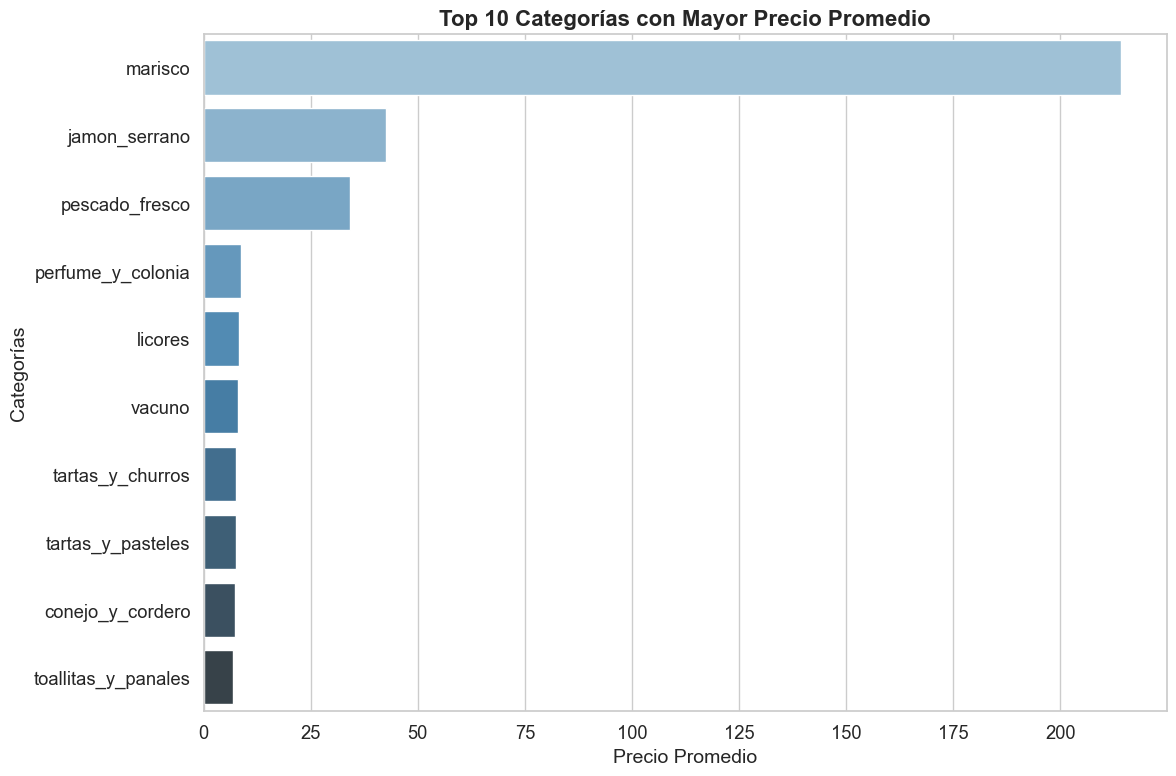

In [45]:
top_categories = category_stats.head(10)

sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_categories.reset_index(),  
    y="category",  # Eje Y: categorías
    x="price_mean",  # Eje X: precio promedio
    palette="Blues_d"  
)

plt.title('Top 10 Categorías con Mayor Precio Promedio', fontsize=16, weight='bold')
plt.xlabel('Precio Promedio', fontsize=14)
plt.ylabel('Categorías', fontsize=14)
plt.tight_layout()

plt.show()

Ahora vamos a comprobar las ventas por dia durante el tiempo que tenemos

In [46]:
mercadona_df['insert_date'] = pd.to_datetime(mercadona_df['insert_date'])


mercadona_df['date'] = mercadona_df['insert_date'].dt.date
mercadona_df['time'] = mercadona_df['insert_date'].dt.time

mercadona_df.drop('insert_date', axis=1, inplace=True)

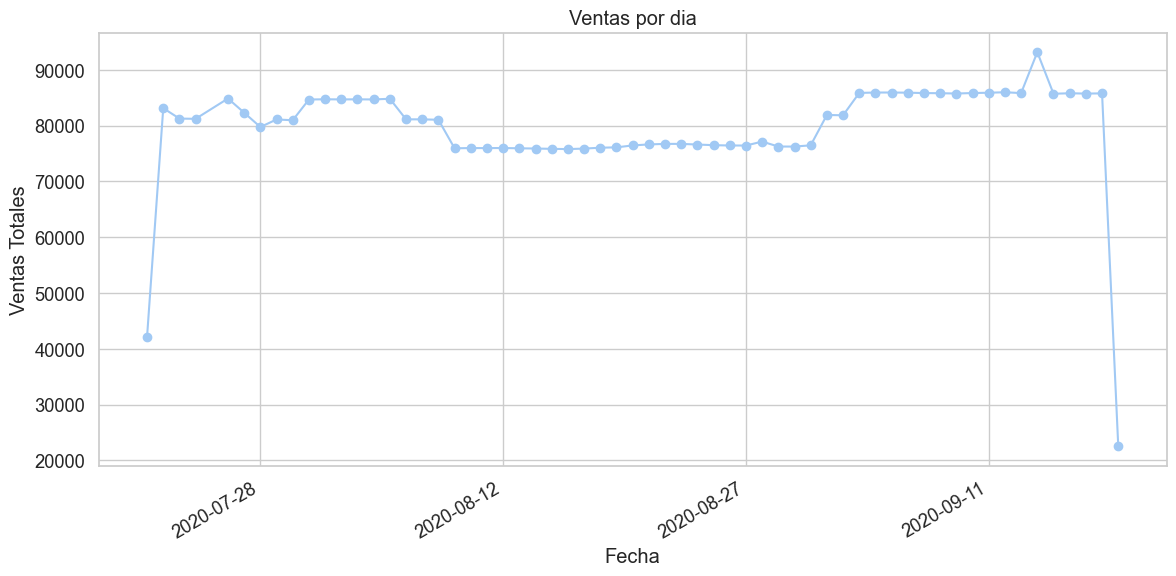

In [47]:
sales_by_day = mercadona_df.groupby('date')['price'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_by_day.index, sales_by_day.values, marker='o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Adjust interval as needed
plt.gcf().autofmt_xdate()
plt.title('Ventas por dia')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.tight_layout()
plt.show()

Ahora vamos a analizar la distribucion temporal de la media del precio de los productos en el tiempo
Agregaremos una columna de año-mes para agrupar los datos temporalmente y calculamos el precio promedio por mes

##### 3. Normalización de variables

Exploración de la columna 'reference_unit'

In [48]:
print(mercadona_df['reference_unit'].value_counts())

reference_unit
kg        376548
L         144167
ud        123283
100 ml     89550
100 g      21829
lv          4321
dc           936
m            468
Name: count, dtype: int64


Normalización de los precios de referencia y de las unidades

In [49]:
def normalize_units(row):
    if row['reference_unit'] == 'g':
        return row['reference_price'] / 1000  # Convertir a kg
    elif row['reference_unit'] == 'ml':
        return row['reference_price'] / 1000  # Convertir a litros
    elif row['reference_unit'] in ['kg', 'litro']:
        return row['reference_price']  # Dejar igual si ya está en kg o litros
    else:
        return row['reference_price']  # Mantener como está para otras unidades

Aplicar la función para crear una nueva columna 'normalized_reference_price'

In [50]:
mercadona_df['normalized_reference_price'] = mercadona_df.apply(normalize_units, axis=1)

Normalización  de la columna 'reference_unit'

In [51]:
def normalize_reference_unit(unit):
    if unit == 'g':
        return 'kg'
    elif unit == 'ml':
        return 'litro'
    else:
        return unit

Crear la columna 'normalized_reference_unit'

In [52]:
mercadona_df['normalized_reference_unit'] = mercadona_df['reference_unit'].apply(normalize_reference_unit)

Comprobar la columna 'PIBFecha' es numérica

In [53]:
assert mercadona_df['PIBFecha'].dtype == 'float64', "La columna 'PIBFecha' debería ser de tipo float."

##### 4. Análisis exploratorio de los datos 

Convertir las columnas categóricas a numéricas antes de calcular la correlación


In [54]:
df_numeric = mercadona_df.copy()
for col in df_numeric.select_dtypes(include='object').columns:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes


Eliminar columnas irrelevantes para la matriz de correlación


In [55]:
df_numeric.drop(['id', 'supermarket', 'PIBFecha'], axis=1, inplace=True)

Valores normalizados

In [56]:
df_numeric.head()

,category,name,price,reference_price,reference_unit,date,time,normalized_reference_price,normalized_reference_unit
0,51,412,0.26,1.29,4,0,4,1.29,4
1,51,4466,0.34,1.99,4,0,4,1.99,4
2,51,4467,0.58,1.95,4,0,4,1.95,4
3,51,5509,2.84,3.79,4,0,4,3.79,4
4,51,5511,2.99,3.99,4,0,4,3.99,4


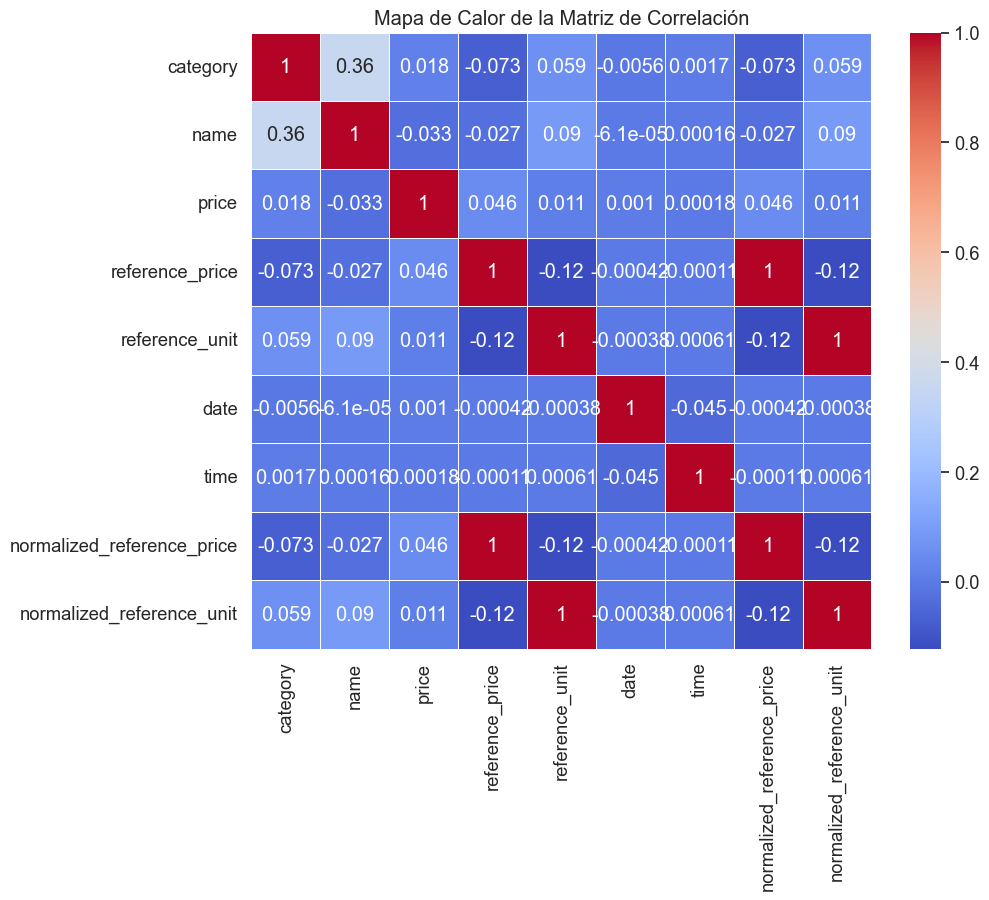

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

##### Conclusion y resumen final del preprocesado

1. Preparación de los datos
    - Iniciamos el proyecto importando las librerías necesarias para el análisis y visualización, tales como pandas, matplotlib y seaborn.
    - Procedimos a cargar el dataset unificado de Mercadona, inspeccionando sus primeras filas para comprender la estructura de los datos y validando su integridad.
    - Eliminamos columnas irrelevantes para nuestro análisis y preprocesamos los datos categóricos, convirtiéndolos a formatos numéricos, facilitando así el cálculo de correlaciones y otras métricas.

2. Detección, tratamiento de outliers (Erroneo) y visualizacion de patrones significativos
    - Detectamos y eliminamos valores atípicos (outliers) utilizando el rango intercuartil (IQR) como criterio, definiendo límites superiores e inferiores en función de los cuartiles de las distribuciones.
    - Fijamos un rango de precios entre 0 y 10 euros para filtrar datos anómalos y mejorar la calidad de los análisis posteriores.
    - Observamos que, aunque la eliminación de outliers reduce el ruido en los datos, existe el riesgo de excluir información valiosa. Esto nos llevó a considerar este paso con cautela.
    - Generamos visualizaciones para explorar tendencias, distribuciones y relaciones en los datos. Estas gráficas resultaron útiles para identificar patrones relevantes como variaciones de precio por categoría y comportamiento en el tiempo.
    - Adicionalmente, evaluamos las ventas diarias en los periodos disponibles, observando tendencias temporales que podrían relacionarse con factores estacionales o económicos.

3. Normalización de variables
    - Normalizamos las columnas clave, como los precios de referencia y las unidades de referencia, generando nuevas variables que nos permitieron realizar un análisis más coherente y evitar problemas derivados de escalas heterogéneas.
    - Este paso incluyó la creación de columnas específicas como normalized_reference_unit y normalized_reference_price.

4. Análisis exploratorio de los datos
    - Exploramos la distribución de los precios en función de las categorías de productos y las unidades de referencia, detectando patrones relevantes.
    - Analizamos tendencias temporales del precio promedio de los productos, creando una nueva columna basada en el agrupamiento por año y mes.
    - Realizamos un análisis de correlaciones entre variables, apoyándonos en un mapa de calor para identificar relaciones significativas entre las distintas métricas.

6. Reflexiones finales
    - La normalización y detección de outliers mejoraron significativamente la calidad de los datos y permitieron una exploración más precisa. Sin embargo, nos encontramos con el desafío de preservar información relevante mientras filtrábamos datos anómalos.
    - Este análisis nos proporcionó una visión inicial clara del comportamiento de los precios y categorías de productos, sentando una base sólida para profundizar en análisis predictivos o de segmentación en futuras fases del proyecto.